In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def save_data(filename, data):
    #Storing data with labels
    a_file = open(filename, "wb")
    pickle.dump(data, a_file)
    a_file.close()
    

def load_data(filename):
    a_file = open(filename, "rb")
    output = pickle.load(a_file)
    a_file.close()
    return output

In [5]:
iteration = '1'
data = load_data('iteration' + iteration + '/iteration_' + iteration + '_zeroshot.pkl')

In [6]:
#find overall accuracy:
overall_accuracy = np.array([pred_label == label for (sentence, pred_label, label, score) in data])
print('Overall Accuracy:', np.sum(overall_accuracy)/len(data))

Overall Accuracy: 0.5057535116260614


In [7]:
#Store in different dictionaries based on actual label
actual_positive = []
actual_negative = []
actual_neutral = []
for (sentence, pred_label, label, score) in data:
    if label == 'positive':
        actual_positive.append((sentence, pred_label, label, score))
    elif label == 'negative':
        actual_negative.append((sentence, pred_label, label, score))
    elif label == 'neutral':
        actual_neutral.append((sentence, pred_label, label, score))
        
print('Check:', (len(actual_positive) + len(actual_negative) + len(actual_neutral)) == len(data))

Check: True


In [8]:
positive_accuracy = np.array([pred_label == label for i, (sentence, pred_label, label, score) in enumerate(actual_positive)])
negative_accuracy = np.array([pred_label == label for i, (sentence, pred_label, label, score) in enumerate(actual_negative)])
neutral_accuracy = np.array([pred_label == label for i, (sentence, pred_label, label, score) in enumerate(actual_neutral)])

print('Positive Accuray:', np.sum(positive_accuracy)/len(actual_positive))
print('Negative Accuracy:', np.sum(negative_accuracy)/len(actual_negative))
print('Neutral Accuracy:', np.sum(neutral_accuracy)/len(actual_neutral))

Positive Accuray: 0.537403474903475
Negative Accuracy: 0.14093775706059775
Neutral Accuracy: 0.7550935550935551


In [9]:
##Sorting by predicting confidence
sorted_actual_positive = sorted(actual_positive, key=lambda k: k[3], reverse=True)
sorted_actual_negative = sorted(actual_negative, key=lambda k: k[3], reverse=True)
sorted_actual_neutral = sorted(actual_neutral, key=lambda k: k[3], reverse=True)

In [30]:
##Total number of samples in top10% high confidence predictions for each class
n_top10_positive = len(actual_positive)//4
n_top10_negative = len(actual_negative)//10
n_top10_neutral = len(actual_neutral)//10

In [31]:
positive_top10_accuracy = np.array([pred_label == label for i, (sentence, pred_label, label, score) in enumerate(sorted_actual_positive) if i < n_top10_positive ])
negative_top10_accuracy = np.array([pred_label == label for i, (sentence, pred_label, label, score) in enumerate(sorted_actual_negative) if i < n_top10_negative ])
neutral_top10_accuracy = np.array([pred_label == label for i, (sentence, pred_label, label, score) in enumerate(sorted_actual_neutral) if i < n_top10_neutral ])

print('Top10 Confidence Positive Accuray:', np.sum(positive_top10_accuracy)/n_top10_positive)
print('Top10 Confidence Negative Accuracy:', np.sum(negative_top10_accuracy)/n_top10_negative)
print('Top10 Confidence Neutral Accuracy:', np.sum(neutral_top10_accuracy)/n_top10_neutral)

Top10 Confidence Positive Accuray: 0.9961389961389961
Top10 Confidence Negative Accuracy: 0.2967032967032967
Top10 Confidence Neutral Accuracy: 0.24116424116424118


In [136]:
neutral_corrected_top10_accuracy = []
for (sentence, pred_label, label, score) in sorted_actual_neutral:
    if score > 0.8 and score < 0.85:
        if pred_label == 'neutral':
            neutral_corrected_top10_accuracy.append(pred_label == label)
            
    if len(neutral_corrected_top10_accuracy) == n_top10_neutral:
        break
        
neutral_corrected_top10_accuracy = np.array(neutral_corrected_top10_accuracy)
print('Top10 Corrected Confidence Neutral Accuracy:', np.sum(neutral_corrected_top10_accuracy)/n_top10_neutral)

Top10 Corrected Confidence Neutral Accuracy: 1.0


In [137]:
##pictorial representation of accuracy as a function of confidence score for each sentiment class

Text(0, 0.5, 'Prediction')

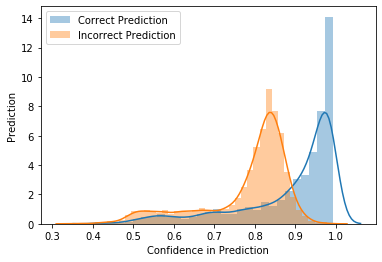

In [138]:
correct = np.array([score for (sentence, pred_label, label, score) in sorted_actual_positive if pred_label == label])
wrong = np.array([score for (sentence, pred_label, label, score) in sorted_actual_positive if pred_label != label])

sns.distplot(correct)
sns.distplot(wrong)
plt.legend(['Correct Prediction', 'Incorrect Prediction'])
plt.xlabel('Confidence in Prediction')
plt.ylabel('Prediction')

Text(0, 0.5, 'Prediction')

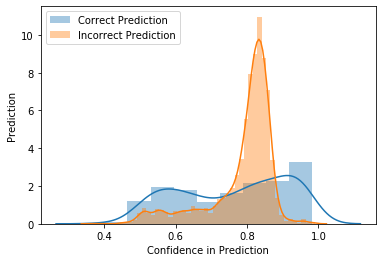

In [139]:
correct = np.array([score for (sentence, pred_label, label, score) in sorted_actual_negative if pred_label == label])
wrong = np.array([score for (sentence, pred_label, label, score) in sorted_actual_negative if pred_label != label])

sns.distplot(correct)
sns.distplot(wrong)
plt.legend(['Correct Prediction', 'Incorrect Prediction'])
plt.xlabel('Confidence in Prediction')
plt.ylabel('Prediction')

Text(0, 0.5, 'Prediction')

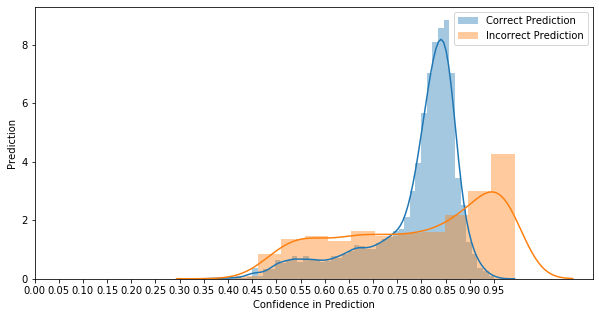

In [140]:
correct = np.array([score for (sentence, pred_label, label, score) in sorted_actual_neutral if pred_label == label])
wrong = np.array([score for (sentence, pred_label, label, score) in sorted_actual_neutral if pred_label != label])

plt.figure(figsize = (10,5))
sns.distplot(correct)
sns.distplot(wrong)
plt.xticks(np.arange(0, 1, 0.05))
plt.legend(['Correct Prediction', 'Incorrect Prediction'])
plt.xlabel('Confidence in Prediction')
plt.ylabel('Prediction')

In [141]:
##Sorting by predicting confidence
sorted_pred_positive = sorted(actual_positive, key=lambda k: k[2], reverse=True)
sorted_pred_negative = sorted(actual_negative, key=lambda k: k[2], reverse=True)
sorted_pred_neutral = sorted(actual_neutral, key=lambda k: k[2], reverse=True)

In [142]:
positive_top10_accuracy = np.array([pred_label == label for i, (sentence, pred_label, label, score) in enumerate(sorted_pred_positive) if i < n_top10_positive ])
negative_top10_accuracy = np.array([pred_label == label for i, (sentence, pred_label, label, score) in enumerate(sorted_pred_negative) if i < n_top10_negative ])
neutral_top10_accuracy = np.array([pred_label == label for i, (sentence, pred_label, label, score) in enumerate(sorted_pred_neutral) if i < n_top10_neutral ])

print('Top10 Confidence Positive Accuray:', np.sum(positive_top10_accuracy)/n_top10_positive)
print('Top10 Confidence Negative Accuracy:', np.sum(negative_top10_accuracy)/n_top10_negative)
print('Top10 Confidence Neutral Accuracy:', np.sum(neutral_top10_accuracy)/n_top10_neutral)

Top10 Confidence Positive Accuray: 0.5140388768898488
Top10 Confidence Negative Accuracy: 0.13658536585365855
Top10 Confidence Neutral Accuracy: 0.7737642585551331


In [143]:
##pictorial representation of accuracy as a function of confidence score for each sentiment class

Text(0, 0.5, 'Prediction')

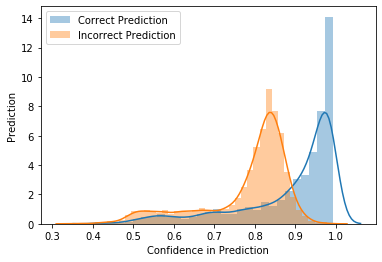

In [144]:
correct = np.array([score for (sentence, pred_label, label, score) in sorted_pred_positive if pred_label == label])
wrong = np.array([score for (sentence, pred_label, label, score) in sorted_pred_positive if pred_label != label])

sns.distplot(correct)
sns.distplot(wrong)
plt.legend(['Correct Prediction', 'Incorrect Prediction'])
plt.xlabel('Confidence in Prediction')
plt.ylabel('Prediction')

Text(0, 0.5, 'Prediction')

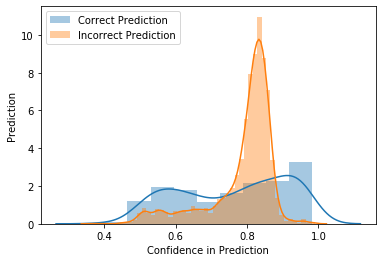

In [145]:
correct = np.array([score for (sentence, pred_label, label, score) in sorted_pred_negative if pred_label == label])
wrong = np.array([score for (sentence, pred_label, label, score) in sorted_pred_negative if pred_label != label])

sns.distplot(correct)
sns.distplot(wrong)
plt.legend(['Correct Prediction', 'Incorrect Prediction'])
plt.xlabel('Confidence in Prediction')
plt.ylabel('Prediction')

Text(0, 0.5, 'Prediction')

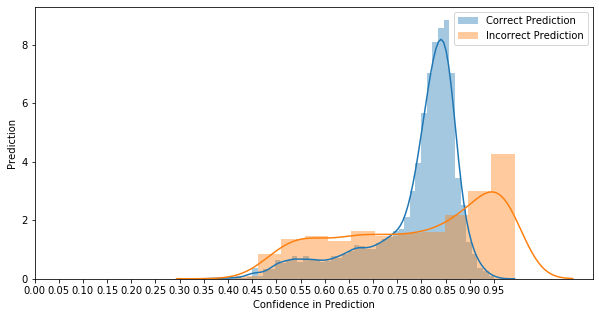

In [146]:
correct = np.array([score for (sentence, pred_label, label, score) in sorted_pred_neutral if pred_label == label])
wrong = np.array([score for (sentence, pred_label, label, score) in sorted_pred_neutral if pred_label != label])

plt.figure(figsize = (10,5))
sns.distplot(correct)
sns.distplot(wrong)
plt.xticks(np.arange(0, 1, 0.05))
plt.legend(['Correct Prediction', 'Incorrect Prediction'])
plt.xlabel('Confidence in Prediction')
plt.ylabel('Prediction')